1. Quante sono le istanze contenute nel dataset?
_____
Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono
“missing values”)?
_____
Il dataset è bilanciato per quanto riguarda la classe da predire?
______
(punti 1)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [71]:
df = pd.read_csv("dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [72]:
print(df.shape[0])
print(df.isnull().sum())
print(df['price_range'].value_counts())

2000
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


2. Considerare la feature battery
power e rappresentare con un istogramma la distribuzione
_
dei valori. Raggruppare poi i valori secondo questa suddivisione: gruppo1 501-800; gruppo2
801-1200; gruppo3 1201-1600; gruppo4 1601-1998, visualizzare la distribuzione nei gruppi.
Indicare per ogni gruppo il numero di istanze per ogni range di prezzo. (punti 3)

<Axes: ylabel='Frequency'>

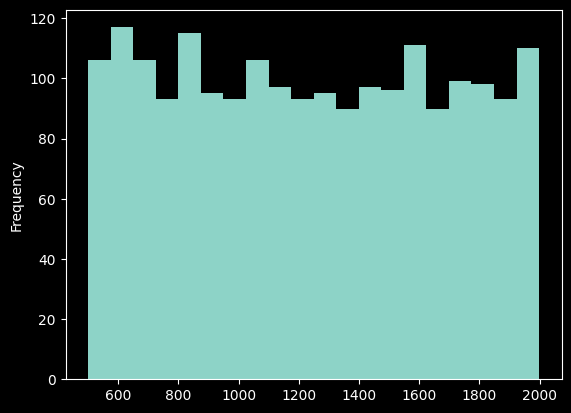

In [73]:
df['battery_power'].plot(kind='hist', bins= 20)

<Axes: xlabel='battery_group'>

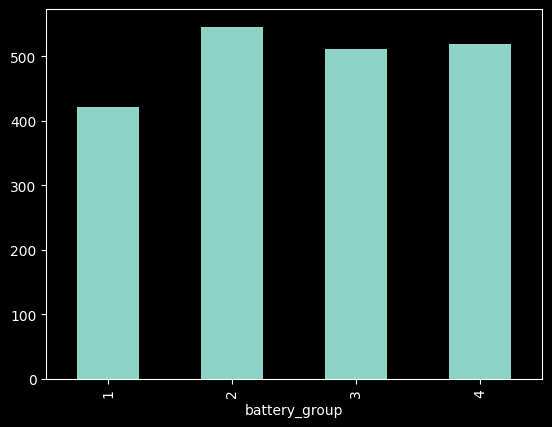

In [74]:
df['battery_group'] = pd.cut(df['battery_power'], bins=[501, 801, 1201, 1601, 1998], labels=[1, 2, 3, 4 ])
df['battery_group'].value_counts().sort_index().plot(kind='bar')

In [75]:
df['battery_group'].value_counts().sort_index()

battery_group
1    421
2    546
3    512
4    519
Name: count, dtype: int64

In [76]:
pd.crosstab(
    index=df['battery_group'],
    columns=df['price_range'],
)

price_range,0,1,2,3
battery_group,,,,
1,137,107,119,58
2,169,141,122,114
3,111,127,123,151
4,83,124,135,177


3. Considerare solo i cellulari che hanno il 4G e una RAM superiore (>) a 2 GB (2048 MB).
Rappresentare in uno scatterplot i valori di ram (ascisse) e memoria interna (ordinate). Colorare
i punti nel grafico in base al valore della colonna price
range. Usare i nomi dei due attributi
_
come etichette dell’asse delle ascisse e dell’asse delle ordinate. (punti 4)

Text(0, 0.5, 'inter memory')

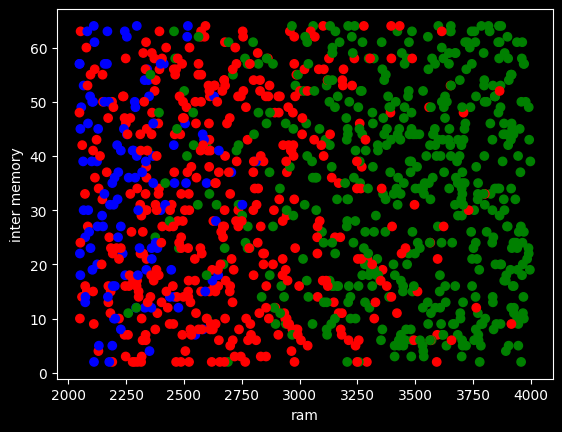

In [77]:
df_4 = df[df['ram'] >= 2048]
color = df_4['price_range'].map({0: 'yellow', 1: 'blue', 2: 'red', 3: 'green'})
plt.scatter(df_4['ram'], df_4['int_memory'], color=color)
plt.xlabel('ram')
plt.ylabel('inter memory')

4. Realizzare una tabella pivot in cui rappresentare il numero di cellulari per ogni range di
prezzo (variabile sulle colonne) considerando sulle righe le variabili touch
screen e
_
int
memory (suddivisa in 5 gruppi). (punti 2)

In [78]:
df['int_memory_group'] = pd.cut(df['int_memory'], bins=5, labels=['Gruppo 1', 'Gruppo 2', 'Gruppo 3', 'Gruppo 4', 'Gruppo 5'])
pivot = df.pivot_table(
    index=['touch_screen', 'int_memory_group'],
    columns='price_range',
    values='ram',
    aggfunc='count',
    observed=False,
)
print(pivot)


price_range                     0   1   2   3
touch_screen int_memory_group                
0            Gruppo 1          53  49  56  52
             Gruppo 2          46  43  53  50
             Gruppo 3          47  56  52  53
             Gruppo 4          35  51  49  50
             Gruppo 5          57  40  55  47
1            Gruppo 1          71  61  68  44
             Gruppo 2          48  49  44  43
             Gruppo 3          56  51  42  44
             Gruppo 4          44  52  42  63
             Gruppo 5          43  48  39  54
